<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Береги-уровень-значимости-с-молоду" data-toc-modified-id="Береги-уровень-значимости-с-молоду-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Береги уровень значимости с молоду</a></span><ul class="toc-item"><li><span><a href="#Песнь-льда-и-пламени" data-toc-modified-id="Песнь-льда-и-пламени-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Песнь льда и пламени</a></span></li><li><span><a href="#Формализация-задачи:" data-toc-modified-id="Формализация-задачи:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Формализация задачи:</a></span></li></ul></li><li><span><a href="#Сколько-нужно-наблюдений" data-toc-modified-id="Сколько-нужно-наблюдений-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сколько нужно наблюдений</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-кнопке" data-toc-modified-id="Гипотеза-о-кнопке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Гипотеза о кнопке</a></span></li><li><span><a href="#Другие-тесты" data-toc-modified-id="Другие-тесты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Другие тесты</a></span></li><li><span><a href="#Кривые-мощности" data-toc-modified-id="Кривые-мощности-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Кривые мощности</a></span></li></ul></li></ul></div>

#  Береги уровень значимости с молоду

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm as tqdm_botebook

plt.style.use('ggplot')
%matplotlib inline

## Песнь льда и пламени

Говорят, Джордж Р.Р. Мартин, автор цикла "Песнь Льда и Пламени", истребляет Старков: чаще убивает персонажей, относящихся к этому дому, чем персонажей других домов. В таблице ниже приведено количество персонажей, относящихся к тому или иному дому, упомянутых за первые $4$ книги, а так же количество погибших персонажей.

| Дом | Упомянутые персонажи | Погибшие персонажи |
|-----|---------------------|------|
|House Stark	| 70 | 25 |
|House Lannister | 38 | 7 |
|House Greyjoy | 41 | 12 |
|Night's Watch |105 | 41 |

Нужно проверить гипотезу об этом на $5\%$ уровне значимости. 

## Формализация задачи:

Нам нужно проверить гипотезу о том, что доля смертей среди Старков совпадает со всеми остальными долями против альтернативы, что хотя бы в одной из ситуаций смертность в доме Старков больше:

\begin{equation*}
\begin{aligned} 
& H_0: p_S = p_L = p_G = p_{NW}  \\
& H_1: \text{хотя бы одна вероятность отличается}  
\end{aligned}
\end{equation*}

Протестируем все гипотезы без коррекции на множественное тестирование, а потом введём её. 

In [2]:
n_st = 70 
m_st = 25

n_lan = 38
m_lan = 7

n_gr = 41
m_gr = 12 

n_nw = 105
m_nw = 41 

alpha = 0.05

In [3]:
m_st/n_st, m_lan/n_lan, m_gr/n_gr, m_nw/n_nw

(0.35714285714285715,
 0.18421052631578946,
 0.2926829268292683,
 0.3904761904761905)

Проверяем три гипотезы!

In [4]:
from statsmodels.stats.proportion import proportions_ztest

_, p1 =  proportions_ztest((m_st, m_lan), 
                           (n_st, n_lan), 
                           value=0, 
                           alternative='larger')


_, p2 =  proportions_ztest((m_st, m_gr), 
                           (n_st, n_gr), 
                           value=0, 
                           alternative='larger')

_, p3 =  proportions_ztest((m_st, m_nw),
                           (n_st, n_nw), 
                           value=0,
                           alternative='larger')

pval = np.array([p1, p2, p3])
pval

array([0.03008672, 0.24343199, 0.67209806])

In [5]:
pval > 0.05 # без коррекции, TRUE - не отвергается

array([False,  True,  True])

Самая первая гипотеза отвергается. Отсюда делаем вывод, что смертность значимо различается. Помним, что ошибка первого рода - ошибочный выбор альтернативы. В случае, когда мы никак не контролируем уровень значимости она оказывается завышена. Посмотрим, что будет происходить при корекции. 

__а)__ Коррекция Бонферрони

In [6]:
pval > 0.05/3  # поделили уровень значимости на число гипотез :) 

array([ True,  True,  True])

In [7]:
from statsmodels.sandbox.stats.multicomp import multipletests 

rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = 0.05, 
                                            method = 'bonferroni') 
p_corrected

array([0.09026015, 0.73029598, 1.        ])

In [8]:
p_corrected > 0.05 # TRUE - не отвергается

array([ True,  True,  True])

Все три гипотезы о равенстве смертностей не отвергаются.

__б)__ Метод Холма

In [9]:
rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = 0.05, 
                                            method = 'holm') 
p_corrected

array([0.09026015, 0.48686399, 0.67209806])

In [ ]:
p_corrected > 0.05 # TRUE - не отвергается

array([ True,  True,  True])

Все три гипотезы о равенстве смертностей не отвергаются.

__в)__ Метод Бенджамини-Хохберга

In [10]:
rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = 0.05,
                                            method = 'fdr_bh') 
p_corrected

array([0.09026015, 0.36514799, 0.67209806])

In [11]:
p_corrected > 0.05 # TRUE - не отвергается

array([ True,  True,  True])

Все три гипотезы о равенстве смертностей не отвергаются. В пакете есть и другие методы коррекции.

https://xkcd.com/882/

![](https://imgs.xkcd.com/comics/significant.png)

#  Сколько нужно наблюдений

Посмотрим на то, как для конкретных критериев можно расчитывать число наблюдений питоновскими средствами. 

## Гипотеза о кнопке

Посмотрим на пример с долями. У нас есть две кнопки: старая и новая. Мы хотим проверить гипотезу о том, что доля нажатий по обеим кнопкам совпадает. В качестве альтернативы рассматриваем вариант, что новый дизайн кнопки оказался лучше и нажать на неё хочется больше.

$$
\begin{aligned}
&H_0: \hspace{2mm} p_0 = p_a \\
&H_1: \hspace{2mm} p_0 < p_a  
\end{aligned}
$$

Величины $p_0$ и $p_a$ мы оцениваем, как отношение кликов на кнопку к показам в контрольной группе и в тестовой группе. Число наблюдений, которое нам необходимо, в таком случае, можно найти по формуле: 

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2,
$$

где $n$- число наблюдений, $\alpha$ - ошибка первого рода, $\beta$ - ошибка второго рода, $z_{1 - \alpha}, z_{1 - \beta}$ - квантили нормального распределения. 


In [13]:
def get_size(p0, pa, alpha, beta):
    za = stats.norm.ppf(1 - alpha)
    zb = stats.norm.ppf(1 - beta)    
    n = za * np.sqrt(p0*(1 - p0)) + zb * np.sqrt(pa*(1-pa))
    n /= (pa - p0)
    return int(np.ceil(n*n))

alpha = 0.05
beta = 0.05

# сколько наблюдений надо, чтобы получить ошибки alpha и beta и уловить минимальный эффект pa - p0
get_size(0.10, 0.15, alpha, beta) 

468

Теперь посчитаем тоже самое с помощью пакета `statsmodels`. Внутри него есть функция `zt_ind_solve_power`. Она может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной пишется `None`. 

Обратите внимание, что в качестве размера эффекта в функцию подаётся стандартизированный эффект, а не оригинальный (отнормированный на стандартное отклонение)

$$
effect = \frac{p_0 - p_a}{se},
$$

при этом стандартная ошибка считается как 

$$
se = \sqrt{\frac{(n_1 - 1)\cdot s_1^2 + (n_2 - 1) \cdot s_2^2 }{n_1 + n_2 - 2}}.
$$

In [22]:
n_0, n_a = 468, 468   # размеры выборок
p_0, p_a = 0.1, 0.15  # доли 

# дисперсии
var_0, var_a = p_0 * (1 - p_0),  p_a * (1 - p_a)

# стандартизированный размер эффекта
standartized_effect = \
    (p_a - p_0) / \
    np.sqrt(( (n_0-1) * var_0 + (n_a-1) * var_a) / (n_0 + n_a - 2))

standartized_effect

0.15161960871578062

In [23]:
from statsmodels.stats.power import zt_ind_solve_power

alpha = 0.05
beta = 0.05

# параметр ratio отвечает за то в какой из двух выборок больше наблюдений
sample_size = zt_ind_solve_power(
                    effect_size=standartized_effect,  # стандартизованный размер эффекта
                    nobs1=None,           # число наблюдений None, тк их хотим найти 
                    alpha=alpha,          # уровень значимости 
                    power=(1 - beta),     # мощность
                    ratio=1,              # перекос в выборках, если 0, тогда выборка только одна
                    alternative='larger'  # альтернатива
                )

print(sample_size) # у нас две выборки, на каждую поровну

941.5291210637375


Подставив `None` вместо другого аргумента функции, можем рассчитать что-нибудь ещё. Например, мощность теста.

In [24]:
zt_ind_solve_power(effect_size=0.15219, 
                   nobs1=941, 
                   alpha=alpha,
                   power=None, 
                   ratio=1,
                   alternative='larger')

0.9511696099123256

Или размер эффекта. 

In [17]:
zt_ind_solve_power(effect_size=None, 
                   nobs1=2*467, 
                   alpha=alpha, 
                   power=1-beta, 
                   ratio=1, 
                   alternative='larger')

0.1522295561785361

По аналогии можно работать с любой асимптотически нормальной статистикой. 

## Другие тесты

По аналогии реализованы [многие другие тесты.](https://www.statsmodels.org/stable/stats.html) Например, тест Стьюдента. Рассмотрим тест для равенства средних при неизвестных, но равных дисперсиях. 

Класс `TTestIndPower` предназначен для анализа мощности для t-теста Стьюдента с независимыми выборками (`TTestPower` для обычного либо с зависимыми выборками).

У каждого объекта этого класса есть метод `solve_power`. Он может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной ствится `None`. 

Снова в качестве эффекта на вход идёт стандартизованный эффект: 

$$
effect = \frac{\bar{x_1} - \bar{x_2}}{se},
$$


In [31]:
from statsmodels.stats.power import TTestIndPower

effect = 0.5
alpha = 0.05
power = 0.95

analysis = TTestIndPower()
analysis.solve_power(effect, 
                     nobs1=None, 
                     power=power, 
                     alpha=alpha, 
                     ratio=1)

104.92794663444455

## Кривые мощности

Построим для мощностей кривые. Они будут показывать размер эффекта и размер выборки влияют на мощность теста. 

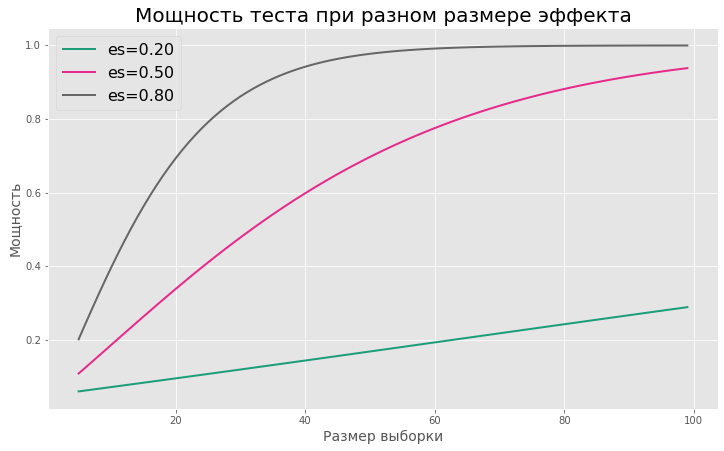

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))

analysis = TTestIndPower()

_, axes = plt.subplots(1, 1, figsize=(12,7))

analysis.plot_power(
    dep_var='nobs',
    nobs=sample_sizes, 
    effect_size=effect_sizes,
    ax=axes
)

axes.set_title("Мощность теста при разном размере эффекта", fontsize=20)
axes.set_xlabel("Размер выборки", fontsize=14)
axes.set_ylabel("Мощность", fontsize=14)
plt.legend(fontsize=16);

На графике мы видим как меняется мощность критерия при трёх разных размерах эффекта. Если нас интересует большой эффект, то мы выходим к единице при примерно $60$ наблюдениях.